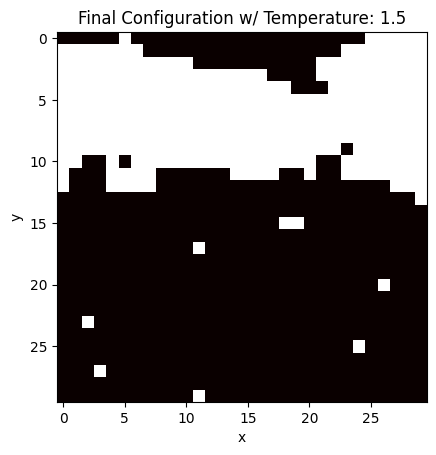

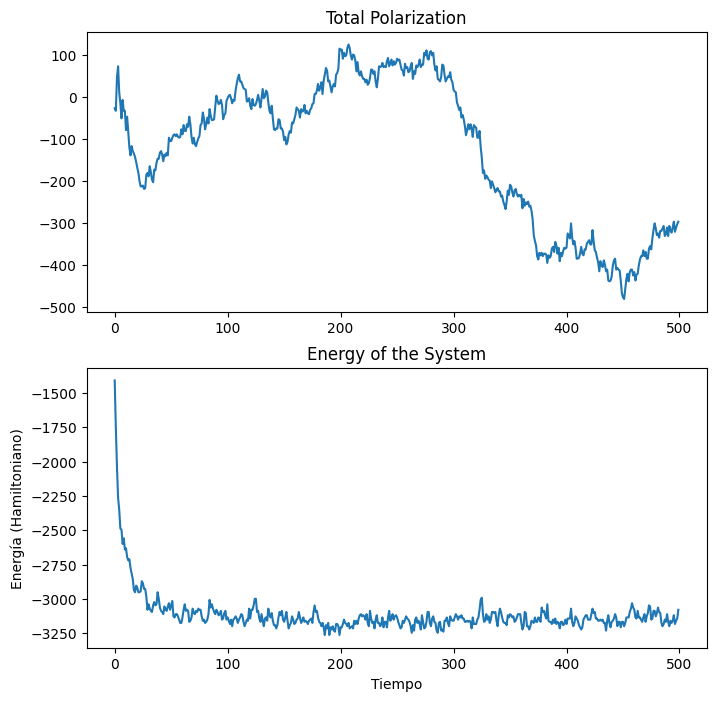

In [3]:
import numpy as np
from numpy.random import randint
from matplotlib import pyplot as plt
import random
import time


start = time.process_time()
square = 30 #Box Size
T = 1.5 #Temperature
n = 500 #Total Time

sizeh: int = square # Height or matrix height
sizew: int = square # Size width or matrix width
material = np.zeros((sizeh, sizew), dtype=int)

numbs = np.array([1, -1])

def Energy_Of_System(matrix):
  #Create energy of the system
    sizeh, sizew = np.array(matrix).shape
    summ = 0
    #Square Mesh takes points (i,j+1), (i, j-1), (i+1,j) and (i-1,j)
    for j in range(sizeh):
        for i in range(sizew):
            summ += material[j][i] * (matrix[(j+1) % sizeh][i] + matrix[(j-1) % sizeh][i] + matrix[j][
                (i+1) % sizew] + matrix[j][(i-1) % sizew] )

    charge = np.sum(matrix)

    return summ, charge


for i in range(sizeh):
    for j in range(sizew):
        material[i, j] = numbs[randint(0, 2)]


Hamiltonian = [0.] * n
Tot_Polarization = [0] * n
Ep = 0

for it in range(n):
    #Energy of the system *spin
    for i in range(sizeh * sizew):  
        rowi, coli = randint(0, sizeh), randint(0, sizew)
        spin = material[rowi][coli]
        E = spin * (material[(rowi+1) % sizeh][coli] + material[(rowi-1) % sizeh][coli] + material[rowi][
            (coli+1) % sizew] + material[rowi][(coli-1) % sizew]) #Agregas matriz (i+1,j+1) y (i-1,j-1)
        
        Ep = -1 * E
        if Ep >= E:
            material[rowi][coli] = material[rowi][coli] * -1
        else:
            if random.random() < np.exp(-1 * (E - Ep) / (T)):
                material[rowi][coli] = material[rowi][coli] * -1

    Hamiltonian[it], Tot_Polarization[it] = Energy_Of_System(material)

Hamiltonian = np.array(Hamiltonian) * -1
plt.imshow(material, cmap='hot', interpolation='nearest')
plt.title("Final Configuration w/ Temperature: " + str(T) )
plt.xlabel('x')
plt.ylabel('y')
#plt.figure()
fig, axs = plt.subplots(2, figsize=(8, 8))
#fig.tight_layout()
axs[0].plot(Tot_Polarization)
plt.xlabel('Tiempo')
plt.ylabel('Polarización')
axs[0].set_title("Total Polarization")
plt.title("Total Polarization of the Sample")
axs[1].set_title("Energy of the System")
axs[1].plot(Hamiltonian)
plt.xlabel('Tiempo')
plt.ylabel('Energía (Hamiltoniano)')
#plt.title("Energy through iterations")
plt.show(block=True)